In [110]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
r = requests.get(uri)

with open('../dados/passageiros.csv', 'wb') as f:
    f.write(r.content)


In [3]:
passageiros = pd.read_csv(uri)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tempo        144 non-null    float64
 1   passageiros  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


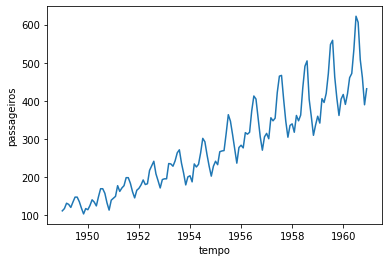

In [5]:
ax = sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros)
ax;

In [15]:
sc = StandardScaler()
dados_ecalados = sc.fit_transform(passageiros)

In [16]:
x = dados_ecalados[:, 0]
y = dados_ecalados[:, 1]


Text(0, 0.5, 'Passageiros')

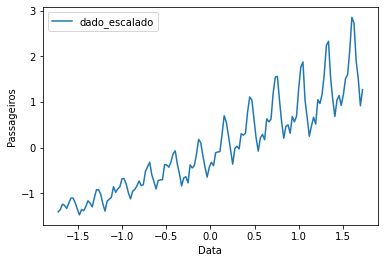

In [20]:
sns.lineplot(x = x , y = y, label = 'dado_escalado')
plt.xlabel('Data')
plt.ylabel('Passageiros')


In [24]:
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)

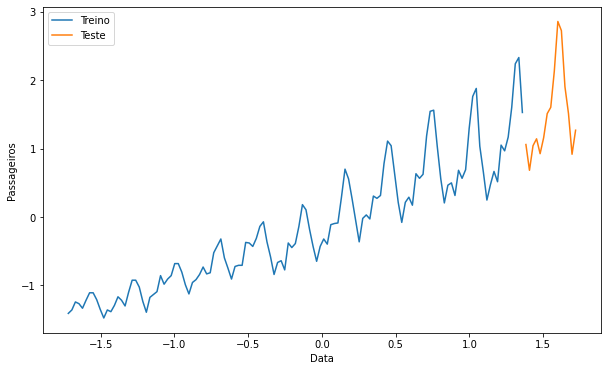

In [42]:
def plot_previsao(x : list, y : list, label : str):
    plt.figure(figsize=(10,6))
    sns.lineplot(x = x_train , y = y_train, label = 'Treino')
    sns.lineplot(x = x , y = y, label = label)

    plt.xlabel('Data')
    plt.ylabel('Passageiros')
plot_previsao(x_test, y_test, 'Teste')

In [84]:
regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear'))
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [85]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [86]:
regressor.fit(x_train, y_train)

5/5 [==============================] - 0s 600us/step - loss: 0.1285


In [87]:
y_predict = regressor.predict(x_train)

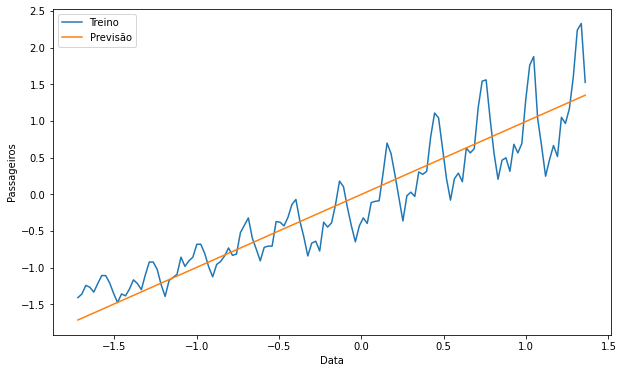

In [88]:
plot_previsao(x_train, y_predict[:,0], 'Previsão')

In [89]:
def retorna_dataframe_retransformado(x, y):
    d = {'tempo' : x, 'passageiros' : y[:,0]}
    resultados = pd.DataFrame(d)

    resultados_transformado = sc.inverse_transform(resultados)
    return pd.DataFrame(resultados_transformado, columns = ['tempo', 'passageiros'])
resultados_transformado = retorna_dataframe_retransformado(x_train, y_predict)
resultados_transformado.head()

,tempo,passageiros
0,1949.000000,75.606509
1,1949.083333,78.469335
2,1949.166667,81.332162
3,1949.250000,84.194989
4,1949.333333,87.057830


In [90]:
y_test_predict = regressor.predict(x_test)
resultado_teste = retorna_dataframe_retransformado(x_test, y_test_predict)

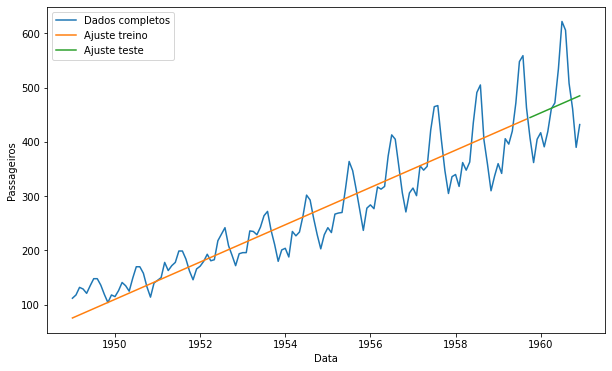

In [91]:
def plot_dados_redimensionado(y_predict_train, y_predict_test):
    resultados_treino = retorna_dataframe_retransformado(x_train, y_predict_train)
    resultados_teste = retorna_dataframe_retransformado(x_test, y_predict_test)

    plt.figure(figsize=(10,6))
    sns.lineplot(x = 'tempo', y = 'passageiros', data= passageiros, label = 'Dados completos')
    sns.lineplot(x = 'tempo', y = 'passageiros', data= resultados_treino, label = 'Ajuste treino')
    sns.lineplot(x = 'tempo', y = 'passageiros', data= resultado_teste, label = 'Ajuste teste')


    plt.xlabel('Data')
    plt.ylabel('Passageiros')
plot_dados_redimensionado(y_predict, y_test_predict)

In [96]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer= 'random_uniform', activation = 'sigmoid', use_bias = False))
regressor2.add(Dense(8, kernel_initializer= 'random_uniform', activation = 'sigmoid', use_bias = False))
regressor2.add(Dense(1, kernel_initializer= 'random_uniform', activation = 'linear', use_bias = False))
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [97]:
regressor2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [107]:
regressor2.fit(x_train, y_train, epochs=1000)

 - 0s 1ms/step - loss: 0.1142
Epoch 758/1000
5/5 [==============================] - 0s 800us/step - loss: 0.1138
Epoch 759/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1140
Epoch 760/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1143
Epoch 761/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1143
Epoch 762/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1144
Epoch 763/1000
5/5 [==============================] - 0s 1000us/step - loss: 0.1151
Epoch 764/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1155
Epoch 765/1000
5/5 [==============================] - 0s 800us/step - loss: 0.1156
Epoch 766/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1154
Epoch 767/1000
5/5 [==============================] - 0s 1000us/step - loss: 0.1152
Epoch 768/1000
5/5 [==============================] - 0s 1000us/step - loss: 0.1157
Epoch 769/1000
5/5 [==============================] - 0s 1ms/step 

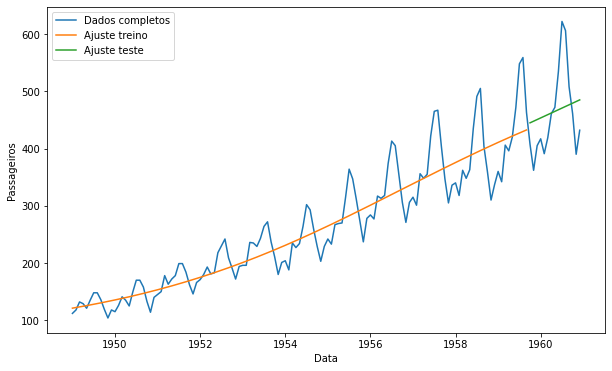

In [109]:
y_predict = regressor2.predict(x_train)
y_predict_test = regressor2.predict(x_test)

plot_dados_redimensionado(y_predict, y_predict_test)

## Mudança nos dados

In [141]:
def separa_dados(vetor, n_passos : int):
    """Entrada: 
            	vetor: Número de passageiros
                n_passos: Número de passos no regressor
       Saída: 
                X_novo : Array 2D
                y_novo : Array 1D - Nosso alvo
    """
    
    X_novo, y_novo = [], []

    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [118]:
vetor = pd.DataFrame(y_train)[0]
new_x_train, new_y_train = separa_dados(vetor, 1)

In [121]:
new_x_train[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [122]:
new_y_train[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [129]:
vetor2 = pd.DataFrame(y_test)[0]
new_x_test, new_y_test = separa_dados(vetor2, 1)


In [124]:
new_x_teste[:5]

array([[1.05982773],
       [0.68341317],
       [1.04309819],
       [1.14347541],
       [0.92599144]])

In [125]:
new_y_teste[:5]

array([0.68341317, 1.04309819, 1.14347541, 0.92599144, 1.16020494])

In [126]:
regressor3 = Sequential()

regressor3.add(Dense(8, input_dim=1, kernel_initializer= 'ones', 
                     activation = 'linear', use_bias = False))
regressor3.add(Dense(64, kernel_initializer= 'random_uniform',
               activation = 'sigmoid', use_bias = False))
regressor3.add(Dense(1, kernel_initializer= 'random_uniform', 
                     activation = 'linear', use_bias = False))
                     
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [128]:
regressor3.fit(new_x_train, new_y_train, epochs=1000)

s: 0.0625
Epoch 757/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 758/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0626
Epoch 759/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0623
Epoch 760/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0625
Epoch 761/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0625
Epoch 762/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 763/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 764/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 765/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0624
Epoch 766/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0627
Epoch 767/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0625
Epoch 768/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0625
Epoch 

In [132]:
y_predict = regressor3.predict(new_x_train)
y_predict_test = regressor3.predict(new_x_test)

<AxesSubplot:xlabel='tempo'>

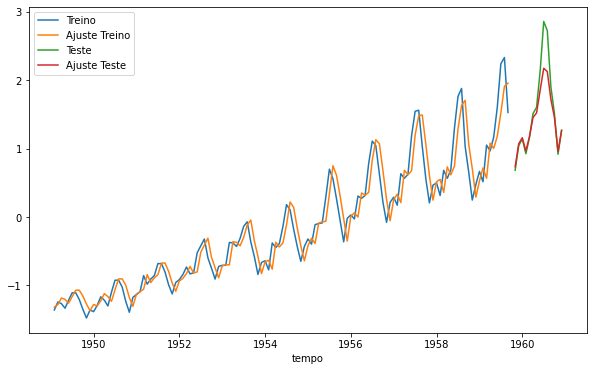

In [138]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'tempo', y = new_y_train, data=passageiros[1:129], label = 'Treino')
sns.lineplot(x = 'tempo', y = y_predict[:,0], data=passageiros[1:129], label = 'Ajuste Treino')
sns.lineplot(x = 'tempo', y = new_y_test, data=passageiros[130:144], label = 'Teste')
sns.lineplot(x = 'tempo', y = y_predict_test[:, 0], data=passageiros[130:144], label = 'Ajuste Teste')



In [142]:
new_x_train , new_y_train = separa_dados(vetor, 4)

In [143]:
new_x_train[:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [144]:
new_y_train[:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [145]:
new_x_test, new_y_test = separa_dados(vetor2, 4)

In [147]:
regressor4 = Sequential()

regressor4.add(Dense(8, input_dim=4, kernel_initializer= 'ones', 
                     activation = 'linear', use_bias = False))
regressor4.add(Dense(64, kernel_initializer= 'random_uniform',
               activation = 'sigmoid', use_bias = False))
regressor4.add(Dense(1, kernel_initializer= 'random_uniform', 
                     activation = 'linear', use_bias = False))
                     
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [149]:
regressor4.fit(new_x_train, new_y_train, epochs=1000)

==] - 0s 1000us/step - loss: 0.0569
Epoch 757/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0568
Epoch 758/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0569
Epoch 759/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0570
Epoch 760/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0569
Epoch 761/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 762/1000
4/4 [==============================] - 0s 999us/step - loss: 0.0568
Epoch 763/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0570
Epoch 764/1000
4/4 [==============================] - 0s 750us/step - loss: 0.0569
Epoch 765/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0568
Epoch 766/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0576
Epoch 767/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0572
Epoch 768/1000
4/4 [==============================] - 0s 1ms/st

In [151]:
y_predict = regressor4.predict(new_x_train)
y_predict_test = regressor4.predict(new_x_test)

<AxesSubplot:xlabel='tempo'>

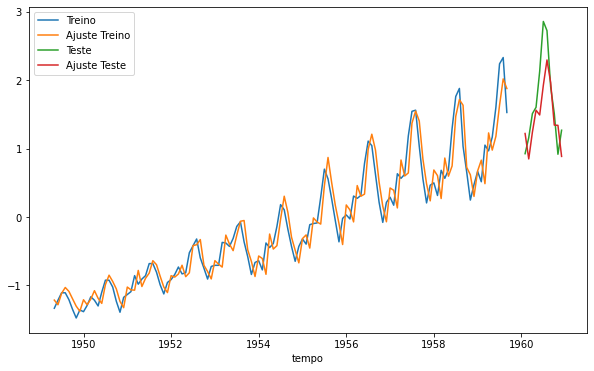

In [153]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'tempo', y = new_y_train, data=passageiros[4:129], label = 'Treino')
sns.lineplot(x = 'tempo', y = y_predict[:,0], data=passageiros[4:129], label = 'Ajuste Treino')
sns.lineplot(x = 'tempo', y = new_y_test, data=passageiros[133:144], label = 'Teste')
sns.lineplot(x = 'tempo', y = y_predict_test[:, 0], data=passageiros[133:144], label = 'Ajuste Teste')